#### PGE 382 - Numerical Methods in Petroleum and Geosystems Engineering
#### Renato Poli - rep2656

#### CP4 - Feb, 28th

### a) Case 1

# Done


''

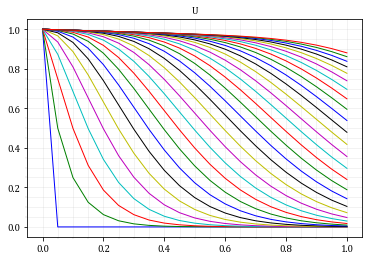

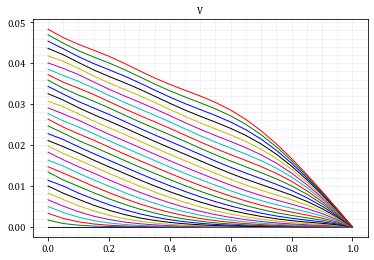

In [1]:
from math import factorial, pi, sin, ceil
import numpy as np
np.set_printoptions(threshold=200, linewidth=200)

from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')

MAXX = 1
MAXT = 1.5

DX = 1 / 20
DT = 1 / 20

C1 = 0.05
C2 = 0.05
B2 = 0.5

X = np.arange(0, MAXX + DX, DX)
T = np.arange(0, MAXT + DT, DT)

nx = len(X)
nt = len(T)

# nx*2 - for U and V(i+nx)
Uni = np.zeros( (nt, nx) )
Vni = np.zeros( (nt, nx) )

Uni[0,1:nx] = 0      # u(x,0)=0, x>0
Uni[0,0] = 1         # u(0,0)=1
Uni[:,0] = 1         # u(0,t)=1

Vni[:,-1] = 0      # v(1,t)=0
Vni[0,:] = 0      # v(x,0)=0

for n in np.arange( 1, nt ) :
    for i in range (1, nx):        
        Uni[n,i]  = 1/DX * Uni[n,i-1] 
        Uni[n,i] += C1   * Vni[n-1,i]
        Uni[n,i] += 1/DT * Uni[n-1,i]
        Uni[n,i] /= 1/DX + 1/DT + C1 
        
    for i in range (nx-1, 0, -1):
        Vni[n,i-1] = (B2/DX - C2 - 1/DT) * Vni[n,i]
        Vni[n,i-1] += 1/DT * Vni[n-1,i]
        Vni[n,i-1] += C2 * Uni[n,i]
        Vni[n,i-1] *= DX/B2
        
import matplotlib.pyplot as plt
evr = 1#int(nt / 20)

plt.plot(X, Uni[::evr,:].transpose())
plt.title("U")
plt.figure()
plt.plot( X, Vni[::evr,:].transpose() )
plt.title("V")

print("# Done")

""


\newpage
### b) Case 2

# Done


''

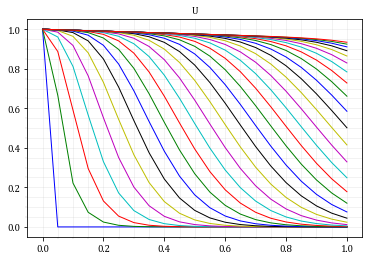

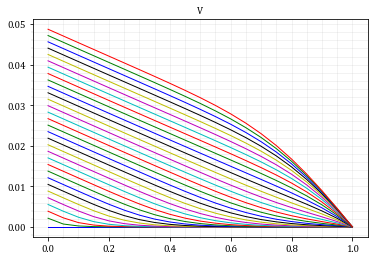

In [2]:
from math import factorial, pi, sin, ceil
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')

MAXX = 1
MAXT = 1.5

DX = 1 / 20
DT = 1 / 20

C1 = 0.05
C2 = 0.05
B2 = 0.5

X = np.arange(0, MAXX + DX, DX)
T = np.arange(0, MAXT + DT, DT)

nx = len(X)
nt = len(T)

# nx*2 - for U and V(i+nx)
Uni = np.zeros( (nt, 2*nx) )

Uni[0,1:nx] = 0      # u(x,0)=0, x>0
Uni[0,0] = 1         # u(0,0)=1
Uni[:,0] = 1         # u(0,t)=1

Uni[:,-1] = 0         # v(1,t)=0
Uni[0,nx:2*nx] = 0    # v(x,0)=0

for n in np.arange( 1, nt ) :
    K = np.zeros( (2*nx, 2*nx) )
    F = np.zeros( 2*nx )
    for i in range( 1, nx ) :
        # U 
        K[i, i]   = -1/2/DX - C1/2 - 1/DT 
        K[i, i-1] = 1/2/DX
        K[i, nx+i] = C1/2
        F[i]  = Uni[ n-1, i ] * ( 1/2/DX + C1/2 - 1/DT ) 
        F[i] += Uni[ n-1, i-1 ] * ( -1/2/DX )
        F[i] += Uni[ n-1, nx+i ] * (-C1/2)

    for i in range( 0, nx-1 ) :
        # V
        K[nx+i, nx+i]   = -B2/2/DX - C2/2 - 1/DT
        K[nx+i, nx+i+1] = B2/2/DX
        K[nx+i, i] = C2/2
        F[nx+i] = Uni[ n-1, nx+i  ] * ( -1/DT + B2/2/DX + C2/2 )
        F[nx+i] += Uni[ n-1, nx+i+1 ] * ( -B2/2/DX )
        F[nx+i] += Uni[ n-1, i ] * ( -C2/2 )

    # boundary condition: u(0,t)=1
    F[1] += -1/2/DX
    F[nx] += -C2/2

    # Remove i=0 and i=-1
    K=K[1:-1,1:-1]
    F=F[1:-1]

#    print(K)
    Un = np.linalg.solve(K,F)
    Uni[n,1:-1] = Un

import matplotlib.pyplot as plt
evr = 1 # int(nt / 20)

plt.plot(X, Uni[::evr,0:nx].transpose())
plt.title("U")
plt.figure()
plt.plot( X, Uni[::evr,nx:2*nx].transpose() )
plt.title("V")

print("# Done")

""
